# K-Nearest Neighbors (KNN) Practical

This is a practical for K Nearest Neighbor (KNN) model machine learning classification model. 

The goal is to group predict the class or label which a new customer will belong to base on certain characteristics of the customer such as age and income. Customers in the dataset are already grouped into 4 categories denoted by `custcat` in the dataset. This is the target vairable for which we are trying to predict which category or class a new customer would belong to based on certain features. 

Before we dive into the practical, here is an overview of key steps in the practical:
* Loading the required libraries
* Data processing and exploration
* Data modelling
* Insight and model evaluation

**The data for this practical was obtained from the IBM cloud storage**.

### Loading the required libraries

In [17]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading and exploring the dataset

In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv")
df.head(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


### Data processing and exploration

First, lets extract ony those features we need for the model to another dataframe

In [4]:
data = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'custcat']]
data.head(5)

,tenure,age,address,income,ed,employ,custcat
0,11.0,33.0,7.0,136.0,5.0,5.0,4.0
1,33.0,33.0,12.0,33.0,2.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,3.0
3,38.0,35.0,5.0,76.0,2.0,10.0,4.0
4,7.0,35.0,14.0,80.0,2.0,15.0,3.0


Now lets explore this data further

In [5]:
# Exploring the details of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tenure   200 non-null    float64
 1   age      200 non-null    float64
 2   address  200 non-null    float64
 3   income   200 non-null    float64
 4   ed       200 non-null    float64
 5   employ   200 non-null    float64
 6   custcat  200 non-null    float64
dtypes: float64(7)
memory usage: 11.1 KB


Notice from above the range of the dataset is 0 to 200, thus each feature should have 200 observation. Notice that all the features contain 200 observations. And the data type in show to be float(64) for all the features.

Lets make the target variable `custcat` a integer instead of a flaot before proceeding with the analysis.

In [6]:
data['custcat'] = data['custcat'].astype(np.int64)

In [7]:
data.custcat.dtypes

dtype('int64')

In [8]:
# Checking for missing values.
data.isnull().sum()

tenure     0
age        0
address    0
income     0
ed         0
employ     0
custcat    0
dtype: int64

In [9]:
data.shape

(200, 7)

In [10]:
# lets see the count for each customer category
data['custcat'].value_counts()

2    61
3    48
4    46
1    45
Name: custcat, dtype: int64

<Axes: >

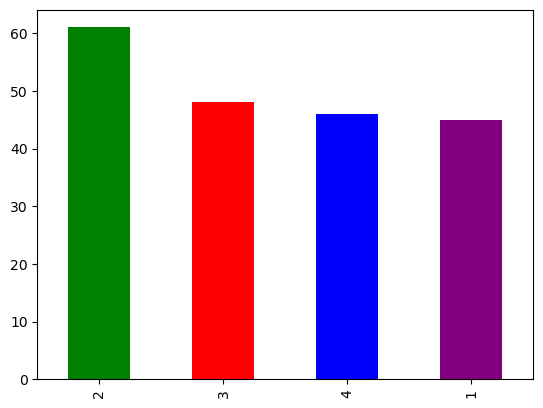

In [11]:
# We can also see the count for each customer category with a graph thus 
data.custcat.value_counts().plot.bar(color=['green', 'red', 'blue', 'purple'])

Now lets split the dataset into two, y for the target variable `custcat` and X containing all other features.

In [12]:
# let X contain all the features except custcat
X = data.iloc[:, :-1]

In [13]:
# lets see a decription of X
X.describe()

,tenure,age,address,income,ed,employ
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000


In machine learning, the standard scaler is used to normalize features so that they have zero means and unit variance. From observation, notice that `income` have a bigger scale than all the other features. In the next lines of code I apply the standard scaler, I normalize the dataset in X, so that my machine-learning algorithm will read the features on an equal scale regardless of their distribution and magnitude.

In [18]:
# Normalizing X using the standard scaler
X= StandardScaler().fit_transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472]])

In [19]:
# let y equals to the target custcat
y = df['custcat'].values
y[0:5]

array([4., 1., 3., 4., 3.])

Now lets split the datasets into training set and testing set as shown below

In [20]:
# spliting the dataset to training and test set

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=10)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (160, 6) (160,)
Test set: (40, 6) (40,)


### Data modelling

#### Determining the optimal k

As said earlier, the goal is to classify customers based similar features. I will use the K-Neighbour classification algorithm to classify the customers. But first, what is the K-Neighbour classification technique? 

The K-Neighbour or K nearest neighbour works by selecting the class base on the majority of the K-nearest data point. 

Where K is the number of nearest neighbour that is used in selecting the class. While there are several ways to choosing the optimal values for K, one method is to test for different values of K and select the K with the highest accuracy as best for the model prediction.

I do this in the next few lines of code.

In [21]:
# determing the optimal k or K-Neighbour classification algorithm

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.325, 0.325, 0.3  , 0.375, 0.4  , 0.425, 0.375, 0.35 , 0.45 ,
       0.4  , 0.475, 0.45 , 0.425, 0.5  , 0.475, 0.425, 0.425, 0.425,
       0.475])

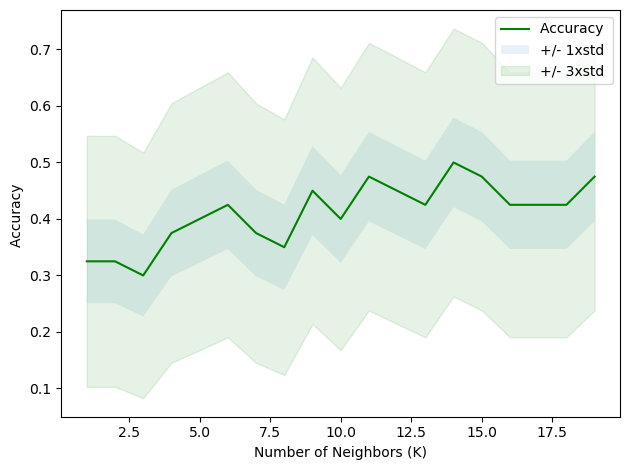

We got the highest accuracy  at 0.5 with k= 14


In [22]:
# Ploting the model accuracy for different values of K
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "We got the highest accuracy  at", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

#### Training model and prediction

From the output above, since the model gets the highest accuracy when K = 14, I proceed with a K of 14 and fit the model with the dataset. 

I also retrieve the predicted y.



In [23]:
k = 14
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=14)

In [24]:
# Retrieving the predicted y
y_predicted = knn.predict(X_test)
y_predicted

array([2., 4., 1., 2., 1., 4., 3., 2., 1., 3., 3., 1., 1., 2., 1., 2., 3.,
       4., 3., 2., 2., 2., 3., 3., 2., 3., 2., 1., 1., 2., 3., 1., 1., 2.,
       2., 2., 2., 1., 1., 2.])

### Insight and model evaluation

To further evaluate the accuracy of the model, I use the some evaluation metric below. Notice that the output of line 41 shows both the accuracy, recall, precision and F1 score have a values. For instance, for the output below, the accuracy indicates the model is correct 50 percent of the time.

In [25]:

def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average= "macro")
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [26]:
evaluate_metrics(y_test, y_predicted)

{'accuracy': 0.5,
 'recall': 0.4861111111111111,
 'precision': 0.4722222222222222,
 'f1score': 0.4589598997493735}

### Thanks for following till the end